In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import sympy

In [2]:
# Part 1

# Defining our matrix of vectors that we can use, as well as b1
U1 = np.array([[0.951057, -0.309017], [0.587785, 0.809017],
[-0.587785, 0.809017], [-0.951057, -0.309017], [0., -1.]])
b1 = .809017

print(U1)
print()
print(b1)

[[ 0.951057 -0.309017]
 [ 0.587785  0.809017]
 [-0.587785  0.809017]
 [-0.951057 -0.309017]
 [ 0.       -1.      ]]

0.809017


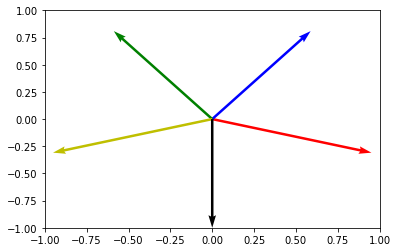

In [3]:
# Lets graph these normal vectors
origin1 = np.array([[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]])

plt.quiver(*origin1, U1[:,0], U1[:,1], color=['r','b','g','y','k'], angles='xy', scale_units='xy', scale=1)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

# These are graphed in order as red, blue, green, yellow, and black. It is easy to see
# The normals are in order

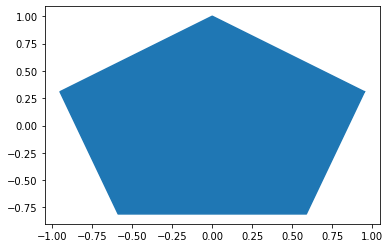

In [4]:
# So now we know that our normals are in order. 
# We have n and b, we just need to use linalg.solve to get the p for out n dot p = b

vertex12 = np.linalg.solve(U1[0:2], [b1,b1])
vertex23 = np.linalg.solve(U1[1:3], [b1,b1])
vertex34 = np.linalg.solve(U1[2:4], [b1,b1])
vertex45 = np.linalg.solve(U1[3:5], [b1,b1])
vertex51 = np.linalg.solve([U1[0], U1[4]], [b1,b1])  #Little different to get first and last rows

V1 = np.array([vertex12, vertex23, vertex34, vertex45, vertex51, vertex12])
xs = V1[:, 0]
ys = V1[:, 1]

plt.figure()
plt.plot(xs,ys) 
plt.fill(xs,ys)
plt.show()

In [5]:
# The shape is a pentagon! Wahoo!
# Next, we want to check to see if [-.2, -.9] is in the polygon.
# Looking at the axis, it is clear to tell it wont be, but lets 
# do the math.

# we want q to satisfy n dot q <= b for all b
q = [-.2, -.9]
print(np.dot(U1, q))
print(np.dot(U1, q) - b1)
print(np.dot(U1, q) - b1 < 0)

# Looking at this comparison it is trival to see that for the last
# normal in U1, q doesn't satisfy n dot q < b. This means that
# q is not in the polygon

[ 0.0879039 -0.8456723 -0.6105583  0.4683267  0.9      ]
[-0.7211131 -1.6546893 -1.4195753 -0.3406903  0.090983 ]
[ True  True  True  True False]


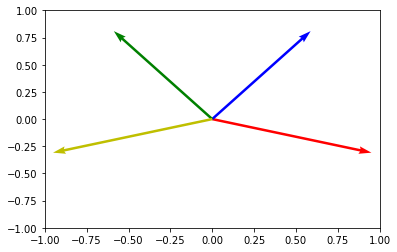

In [6]:
# Problem 2
# Now we are using these normal vectors
U2 = np.array([[0.951057, -0.309017], [0.587785,0.809017], [-0.587785, 0.809017], [-0.951057, -0.309017]])

origin2 = np.array([[0, 0, 0, 0],[0, 0, 0, 0]])

plt.quiver(*origin2, U2[:,0], U2[:,1], color=['r','b','g','y'], angles='xy', scale_units='xy', scale=1)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

# The colors are red, blue, green, and yellow. It is easy to see they are in order

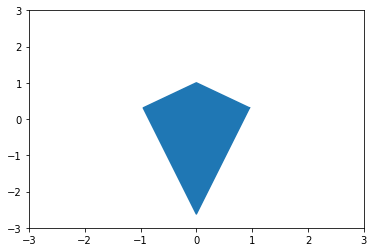

In [7]:
# Now to find the verticies. All are the same except the 4 to 1 vertex. 
vertex41 = np.linalg.solve([U2[0], U2[3]], [b1,b1])

# And lastly, do the fun graphing things again
V2 = np.array([vertex12, vertex23, vertex34, vertex41, vertex12])
xs = V2[:, 0]
ys = V2[:, 1]

plt.figure()
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.plot(xs,ys) 
plt.fill(xs,ys)
plt.show()


In [8]:
# So we have a kite! Now, we want to see if the same q is in here

print(np.dot(U2, q))
print(np.dot(U2, q) - b1)
print(np.dot(U2, q) - b1 < 0)

# Since the output is all true, q is in the region!

[ 0.0879039 -0.8456723 -0.6105583  0.4683267]
[-0.7211131 -1.6546893 -1.4195753 -0.3406903]
[ True  True  True  True]


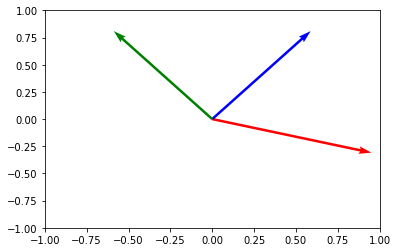

In [9]:
# Part 3

# Doing the process once again with U3

U3 = np.array([[0.951057, -0.309017], [0.587785, 0.809017], [-0.587785, 0.809017]])
origin3 = np.array([[0, 0, 0],[0, 0, 0]])

plt.quiver(*origin3, U3[:,0], U3[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

# The order is red, blue, green. So we still have the verticies in order

Is this vertex less then 0?
[ 0.        1.809015 -0.      ]

[1.53884056 2.11803262]


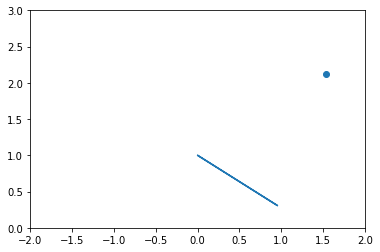

In [10]:
# Now to find the verticies. All are the same except the 3 to 1 vertex. 
vertex31 = np.linalg.solve([U3[0], U3[2]], [b1,b1])

# Lets make sure our vertex passes the test
print("Is this vertex less then 0?")
print(np.round((np.dot(U3, vertex31) - b1), 6))
print()

# Uh oh! So this vertex doesn't work. We only have 2 verticies, and the polygon is unbounded
# We can still graph the two 
# And lastly, do the fun graphing things again
V3 = np.array([vertex12, vertex23, vertex12])
xs = V3[:, 0]
ys = V3[:, 1]

xs1 = np.linalg.solve([U3[0], U3[2]], [b1,b1])
print(xs1)

plt.figure()
plt.xlim(-2,2)
plt.ylim(0,3)
plt.plot(xs,ys)
plt.scatter(xs1[0], xs1[1])
plt.fill(xs,ys)
plt.show()

In [11]:
# Well, we can still check if q satisfies the conditions
print(np.dot(U3, q))
print(np.dot(U3, q) - b1)
print(np.dot(U3, q) - b1 < 0)

# Since the output is all true, q is in the region!

[ 0.0879039 -0.8456723 -0.6105583]
[-0.7211131 -1.6546893 -1.4195753]
[ True  True  True]


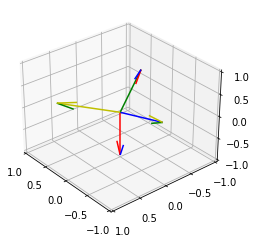

In [12]:
# Problem 4

# Our new set of normal vectors
W = np.array([[0., 0., -1.], [-0.942809, 0., 0.333333],
[0.471405, -0.816497, 0.333333], [0.471405, 0.816497, 0.333333]])

# The new b
b4 = 0.204124

# Graph the normal vectors
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.quiver(0, 0, 0, W[:,0], W[:,1], W[:,2], color=['r','b','g','y'])
ax.azim = 140
plt.show()
# Unfortunately, the colors get slightly messed up. But the main color is the one that it is
# Supposed to be




/home/ibutz/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/ibutz/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


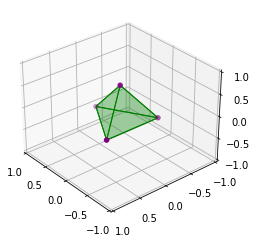

In [13]:
# Now solve for all of the verticies
vertex123 = np.linalg.solve(W[0:3], [b4,b4,b4])
vertex124 = np.linalg.solve([W[0], W[1], W[3]], [b4,b4,b4])
vertex134 = np.linalg.solve([W[0], W[2], W[3]], [b4,b4,b4])
vertex234 = np.linalg.solve([W[1], W[2], W[3]], [b4,b4,b4])

# put these in an array
V4 = np.array([vertex123, vertex124, vertex134, vertex234])

# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Using SciPy to get the convex hull given the points
hull = ConvexHull(V4)

# For each one, it will draw the convex hull
for s in hull.simplices:
    tri = Poly3DCollection(V4[s])
    tri.set_color('g')   # <-- color
    tri.set_alpha(0.2)   # <-- opacity
    ax.add_collection3d(tri)
   
# draw the vertices
ax.scatter(V4[:, 0], V4[:, 1], V4[:, 2], marker='o', color='purple')

# Getting a good angle
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.azim = 140
plt.show()



n1 is:  [ 0.  0. -1.]
b1 is:  0.707107



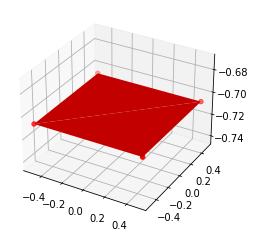

In [14]:
# Problem 5

# 5.a

# First, we need to find the normal to F1
F1 = np.array([[-0.5, 0.5, -0.707107], [0.5, 0.5,
-0.707107], [0.5, -0.5, -0.707107], [-0.5, -0.5, -0.707107]])

v12 = F1[1] - F1[0]
v13 = F1[2] - F1[0]

# v12 and v13 are 2 linearly independent vectors in the hyperplane
# This allows us to take a cross product to find the normal. We also
# want to make it a unit vector
n1 = np.cross(v12, v13) / np.linalg.norm(np.cross(v12, v13))
print("n1 is: ", n1)


# Now, we want to find b. We have the n, so just use a vertex as
# p in the n dot p = b formula
b1 = np.dot(n1, F1[0])
print("b1 is: ", b1)
print()

# Now that we have a b, lets plot the points to get a face

# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(F1[:, 0], F1[:, 1], F1[:, 2], marker='o', color='r')
ax.plot_trisurf(F1[:, 0], F1[:, 1], F1[:, 2], color='r')
#ax.set_xlim3d(-1, 1)
#ax.set_ylim3d(-1, 1)
#ax.set_zlim3d(-5, .5)
plt.show()

# This will be a square



n2 is:  [ 0.70710678 -0.70710678  0.        ]
b2 is:  0.7071067811865475


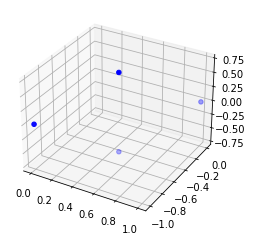

In [15]:
# 5.b
# Follow the same process as above with F2
F2 = np.array([[0.5, -0.5, 0.707107], [0., -1., 0.], [0.5, -0.5, -0.707107], [1., 0., 0.]])

v12 = F2[1] - F2[0]
v13 = F2[2] - F2[0]
# v12 and v13 are 2 linearly independent vectors in the hyperplane
# This allows us to take a cross product to find the normal. We also
# want to make it a unit vector
n2 = np.cross(v12, v13) / np.linalg.norm(np.cross(v12, v13))
print("n2 is: ", n2)

# Now, we want to find b. We have the n, so just use a vertex as
# p in the n dot p = b formula
b2 = np.dot(n2, F2[0])
print("b2 is: ", b2)

# tri = sp.spatial.Delaunay(F2, qhull_options='Qb1:0B1:0')
# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(F2[:, 0], F2[:, 1], F2[:, 2], marker='o', color='b')

# This wont work for some reason. Just the points unfortunately
#ax.plot_trisurf(F2[:, 0], F2[:, 1], F2[:, 2], color='r')

# ax.set_xlim3d(-1, 1)
# ax.set_ylim3d(-1, 1)
# ax.set_zlim3d(-1, 2)
# ax.azim = 135
plt.show()
# Once again, this is a square

n3 is:  [ 0.          0.81649667 -0.57735015]
b3 is:  0.8164966651490371



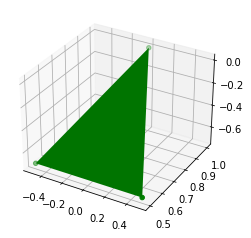

In [16]:
# 5.c
# Follow the same process as above with F3
F3 = np.array([[0., 1., 0.], [0.5, 0.5, -0.707107], [-0.5, 0.5, -0.707107]])

v12 = F3[1] - F3[0]
v13 = F3[2] - F3[0]
# v12 and v13 are 2 linearly independent vectors in the hyperplane
# This allows us to take a cross product to find the normal. We also
# want to make it a unit vector
n3 = np.cross(v12, v13) / np.linalg.norm(np.cross(v12, v13))
print("n3 is: ", n3)

# Now, we want to find b. We have the n, so just use a vertex as
# p in the n dot p = b formula
b3 = np.dot(n3, F3[0])
print("b3 is: ", b3)

print()
# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(F3[:, 0], F3[:, 1], F3[:, 2], marker='o', color='g')
ax.plot_trisurf(F3[:, 0], F3[:, 1], F3[:, 2], color='g')
#ax.set_xlim3d(-1, 1)
#ax.set_ylim3d(-1, 1)
#ax.set_zlim3d(-1, 2)
plt.show()
# Now, this is a triange

<ipython-input-17-25d008e677f1>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = A.astype(np.float)
F1 dot A
[[ 0.5      -0.5       0.707107]
 [ 0.       -1.        0.      ]
 [ 0.5      -0.5      -0.707107]
 [ 1.       -0.        0.      ]]
F2
[[ 0.5      -0.5       0.707107]
 [ 0.       -1.        0.      ]
 [ 0.5      -0.5      -0.707107]
 [ 1.        0.        0.      ]]

Is A^2 = eye(3)?
[[ True False  True]
 [False  True  True]
 [ True  True  True]]

Graph of points


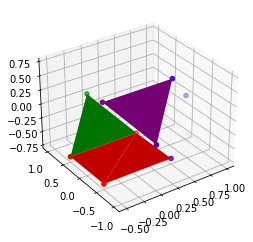

In [17]:
# Problem 6

#6.a
# linalg.solve did not like this. So we use a slightly different way. Get 2 Matrix
f1 = sympy.Matrix(F1)
f2 = sympy.Matrix(F2)
# Solve
A = f1.LUsolve(f2)
A = np.array(A)
A = A.astype(np.float)

# Lets check this works
print("F1 dot A")
print(np.round(np.dot(F1, A.T), 6))
print("F2")
print(F2)
print()

# These two are the same! I rounded to 6 digits and I got the same matrix!

#6.b
# Next, we will check to see the smallest power of A that is equal to the identity 
# matrix. Lets check squared against the identity matrix
print("Is A^2 = eye(3)?")
print(np.linalg.matrix_power(A,2) == np.identity(3))
print()

# Well, according to python all it takes is a square for A to become identity

#6.c
# Applying the matrix
nF3 = np.dot(F3, A.T)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_trisurf(F1[:, 0], F1[:, 1], F1[:, 2], color='r')
# ax.plot_trisurf(F2[:, 0], F2[:, 1], F2[:, 2], color='b')
ax.plot_trisurf(F3[:, 0], F3[:, 1], F3[:, 2], color='g')
ax.plot_trisurf(nF3[:, 0], nF3[:, 1], nF3[:, 2], color='purple')

ax.scatter(F1[:, 0], F1[:, 1], F1[:, 2], marker='o', color='r')
ax.scatter(F2[:, 0], F2[:, 1], F2[:, 2], marker='o', color='b')
ax.scatter(F3[:, 0], F3[:, 1], F3[:, 2], marker='o', color='g')
ax.scatter(nF3[:, 0], nF3[:, 1], nF3[:, 2], marker='o', color='purple')

print("Graph of points")
ax.azim = 235
plt.show()

# Here, F1 is red, F2 is blue, F3 is green, and the new F3 is purple. It is a triangle still
# Unfortunately I still couldn't get F2 to load


In [18]:
#6.d
A = np.array(A)
A = A.astype(np.float)
evalues, Evecs = sp.linalg.eig(A)

print("The eigenvalues are: ", evalues)
print("The Eigenvectors are: ")
print(Evecs)

# So our stable eigenvector is the second one. Now, recreate the plot from above and add it in 

The eigenvalues are:  [-1.+0.j  1.+0.j -1.+0.j]
The Eigenvectors are: 
[[-0.86602545 -0.50000008  0.07531742]
 [-0.28867515  0.50000008 -0.78829717]
 [-0.40824819  0.70710667  0.61066755]]
<ipython-input-18-c66ef718bbf9>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = A.astype(np.float)


Graph of points


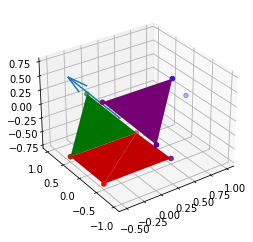

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_trisurf(F1[:, 0], F1[:, 1], F1[:, 2], color='r')
# ax.plot_trisurf(F2[:, 0], F2[:, 1], F2[:, 2], cmap='viridis', edgecolor='none')
ax.plot_trisurf(F3[:, 0], F3[:, 1], F3[:, 2], color='g')
ax.plot_trisurf(nF3[:, 0], nF3[:, 1], nF3[:, 2], color='purple')

ax.scatter(F1[:, 0], F1[:, 1], F1[:, 2], marker='o', color='r')
ax.scatter(F2[:, 0], F2[:, 1], F2[:, 2], marker='o', color='b')
ax.scatter(F3[:, 0], F3[:, 1], F3[:, 2], marker='o', color='g')
ax.scatter(nF3[:, 0], nF3[:, 1], nF3[:, 2], marker='o', color='purple')
ax.quiver(0, 0, 0, Evecs[0][1], Evecs[1][1], Evecs[2][1])

print("Graph of points")
ax.azim = 235
plt.show()

In [20]:
# e.
# This is a flip. It takes F3 and mirrors it across
